# one hot encoding

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [6]:
# building dummy data
data = {'EmployeeID': [10, 20, 15, 25, 30],
        'gender': ['M', 'F', 'F', 'M', 'F'],
        'remarks': ['good', 'average', 'excellent', 'good', 'excellent']}

df = pd.DataFrame(data)
print('emp data: \n',df)

emp data: 
    EmployeeID gender    remarks
0          10      M       good
1          20      F    average
2          15      F  excellent
3          25      M       good
4          30      F  excellent


In [ ]:
# extract catogerical colum ns
# Here we extract the columns with object datatype as they are categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print('\nCategorical columns:', categorical_cols)


Categorical columns: ['gender', 'remarks']


In [13]:
# initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
# apply one hot encoding to categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns= encoder.get_feature_names_out(categorical_cols))

# concatenate the original DataFrame (excluding categorical columns) with the encoded DataFrame
df_final = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
print(f'\nData after One Hot Encoding: \n{df_final}')


Data after One Hot Encoding: 
   EmployeeID  gender_F  ...  remarks_excellent  remarks_good
0          10       0.0  ...                0.0           1.0
1          20       1.0  ...                0.0           0.0
2          15       1.0  ...                1.0           0.0
3          25       0.0  ...                0.0           1.0
4          30       1.0  ...                1.0           0.0

[5 rows x 6 columns]


In [ ]:
df_final.head() 

,EmployeeID,gender_F,gender_M,remarks_average,remarks_excellent,remarks_good
0,10,0.0,1.0,0.0,0.0,1.0
1,20,1.0,0.0,1.0,0.0,0.0
2,15,1.0,0.0,0.0,1.0,0.0
3,25,0.0,1.0,0.0,0.0,1.0
4,30,1.0,0.0,0.0,1.0,0.0


# Sigmoid function 

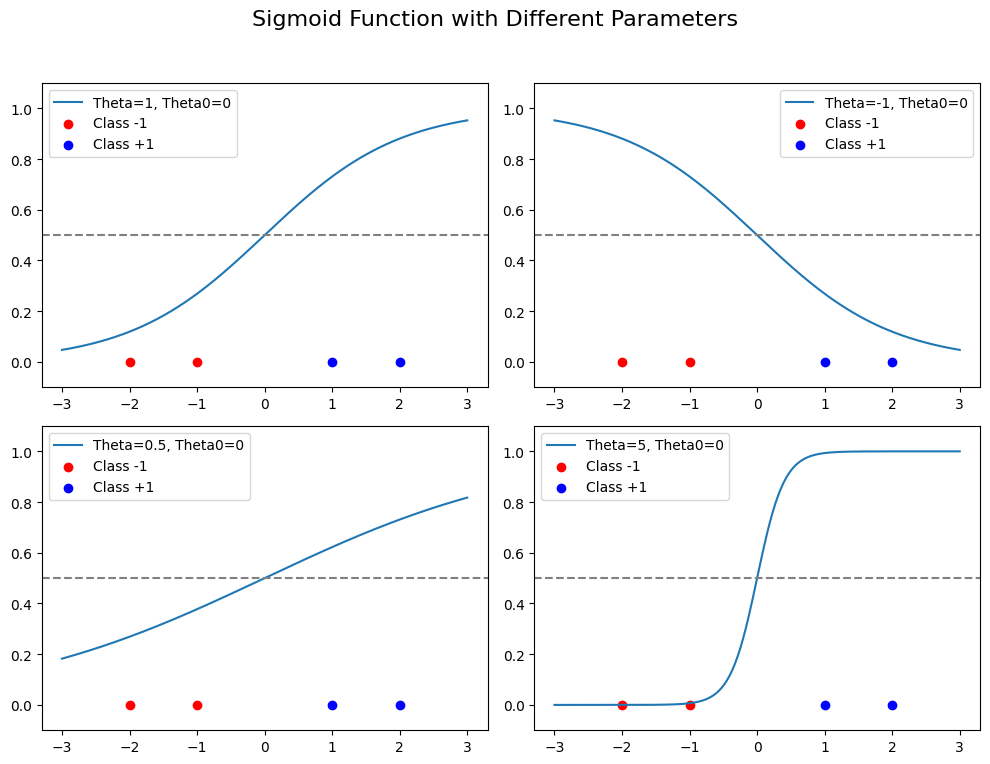

In [4]:
# def sigmoid function
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

#define points and classes:
x_points = np.array([-2,-1,1,2])
y_labels = np.array([0,0,1,1])

parameters = [
    (1,0),
    (-1,0),
    (.5,0),
    (5,0)
]

# create figure with 4 sub plots
fig, axs = plt.subplots(2,2, figsize=(10,8))

for ax, (theta,theta0) in zip(axs.ravel(), parameters):
    x_range = np.linspace(-3,3,300)
    z = theta * x_range + theta0
    y = sigmoid(z)
    
    ax.plot(x_range, y, label=f'Theta={theta}, Theta0={theta0}')
    ax.scatter(x_points[:2], x_points[:2]-x_points[:2],color='red', label='Class -1')
    ax.scatter(x_points[2:], x_points[2:]-x_points[2:],color='blue', label='Class +1')

    ax.axhline(y=0.5, color='gray', linestyle='--')
    ax.set_ylim(-0.1,1.1)
    ax.legend()

fig.suptitle('Sigmoid Function with Different Parameters', fontsize=16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

##  Logistic regression gradient dessent explaination

In [7]:
#define sigmoid function
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [8]:
# define compute loss function
def compute_loss(y,hx):
    return -np.mean(y * np.log(hx)+(1-y)* np.log(1-hx))

In [9]:
# gradient of loss
def compute_gradient(X,y,hx):
    return np.dot(X.T, (hx - y)) / y.shape[0]

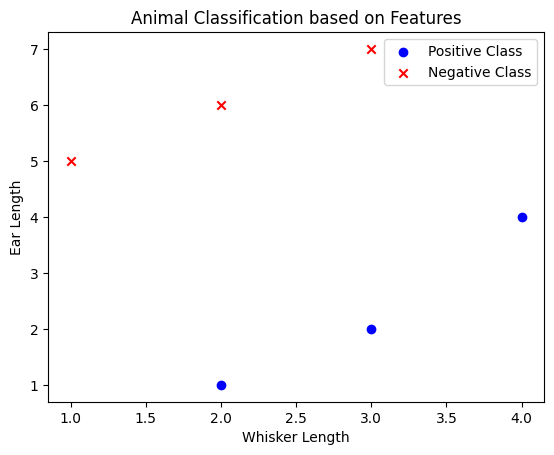

In [10]:
# dataset
X = np.array([
    [2,1],
    [3,2],
    [4,4],
    [1,5],
    [2,6],
    [3,7]
])
y = np.array([1,1,1,0,0,0])

# plot initial data
plt.scatter(X[:3,0],X[:3,1], color = 'blue', marker='o', label='Positive Class')
plt.scatter(X[3:,0],X[3:,1], color = 'red', marker='x', label='Negative Class')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Length')
plt.legend()
plt.title('Animal Classification based on Features')
plt.show()

In [28]:
# Logistic regression model
def logistic_regression(X, y, learning_rate=0.01, num_iterations=100):

    # Add intercept term to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # Gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)

        loss = compute_loss(y, hx)
        gradient = compute_gradient(X, y, hx)

        weights -= learning_rate * gradient

        if i% 10==0:
            plot_decision_boundary(X, y, weights, loss, i)
            print(f"Iteration {i}: Theta={weights}, Loss={loss}")

    return weights


In [29]:
# Plotting function for decision boundary
def plot_decision_boundary(X, y, weights, loss, iteration):

    plt.scatter(X[:3, 1], X[:3, 2], color='blue', marker='o',
                label='Positive class' if iteration == 0 else "")
    plt.scatter(X[3:, 1], X[3:, 2], color='red', marker='x',
                label='Negative class' if iteration == 0 else "")

    # Extend the x values a bit beyond the dataset range
    x_values = np.array([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]

    plt.plot(x_values, y_values, "k")

    plt.xlim(x_values[0], x_values[1])
    plt.ylim(np.min(X[:, 2]) - 1, np.max(X[:, 2]) + 1)

    plt.xlabel('Whisker length')
    plt.ylabel('Ear flappiness index')
    plt.title(f"Decision boundary at iteration {iteration}\nLoss: {loss}")

    if iteration == 0:
        plt.legend()

    plt.show()


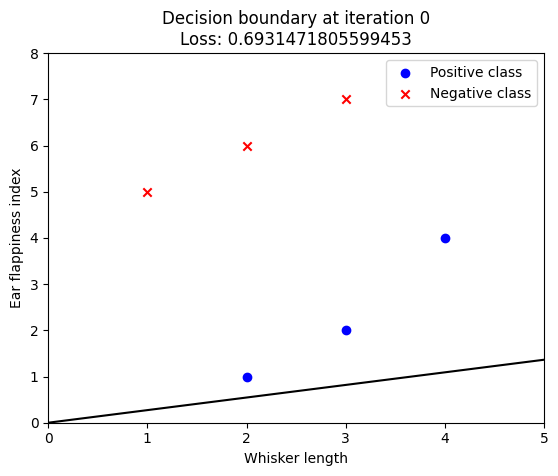

Iteration 0: Theta=[ 0.          0.0025     -0.00916667], Loss=0.6931471805599453


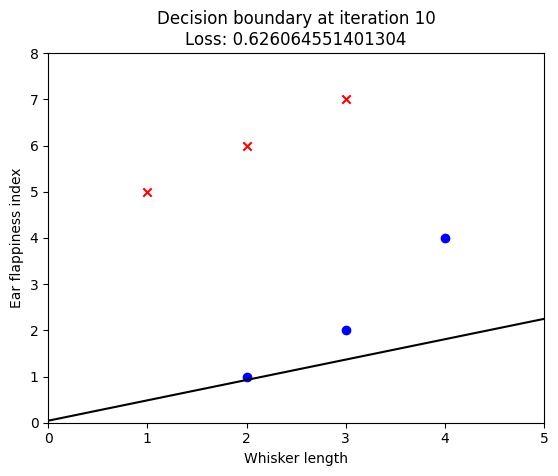

Iteration 10: Theta=[ 0.00351898  0.03583314 -0.08124515], Loss=0.626064551401304


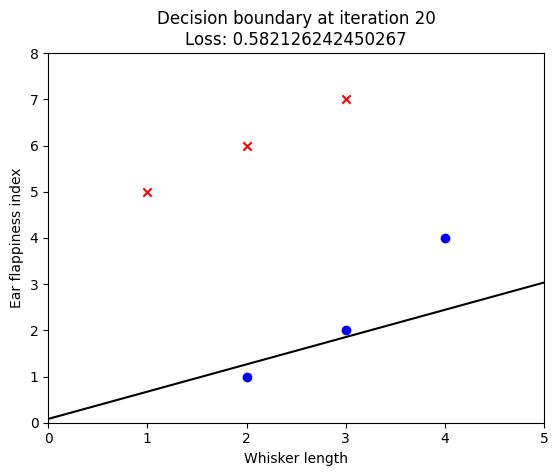

Iteration 20: Theta=[ 0.0107534   0.07750049 -0.13121449], Loss=0.582126242450267


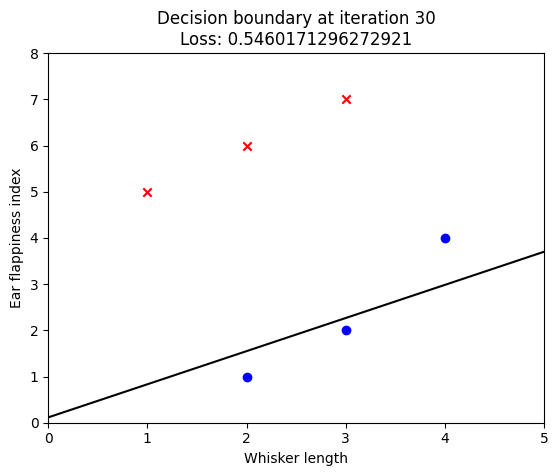

Iteration 30: Theta=[ 0.01952555  0.12200009 -0.17007813], Loss=0.5460171296272921


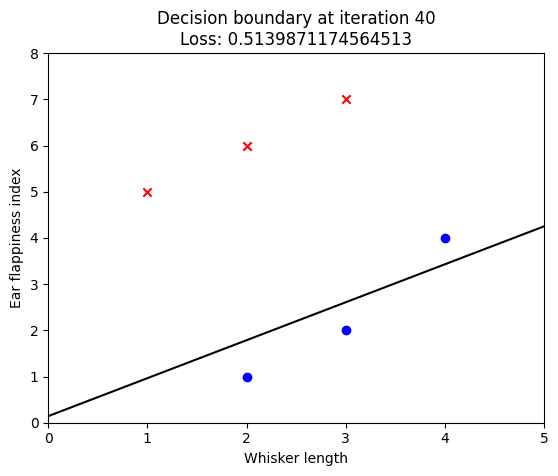

Iteration 40: Theta=[ 0.02882972  0.16681759 -0.20296236], Loss=0.5139871174564513


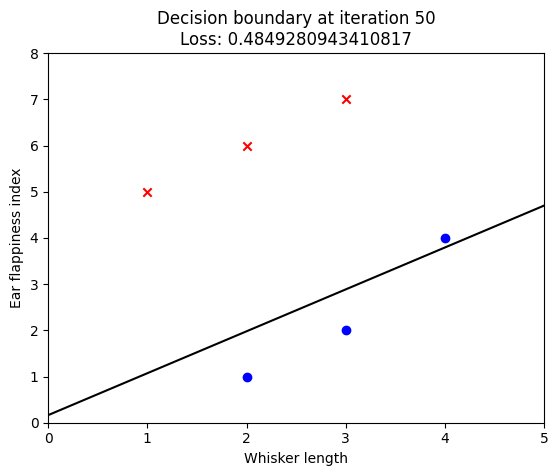

Iteration 50: Theta=[ 0.03819345  0.21079708 -0.23234289], Loss=0.4849280943410817


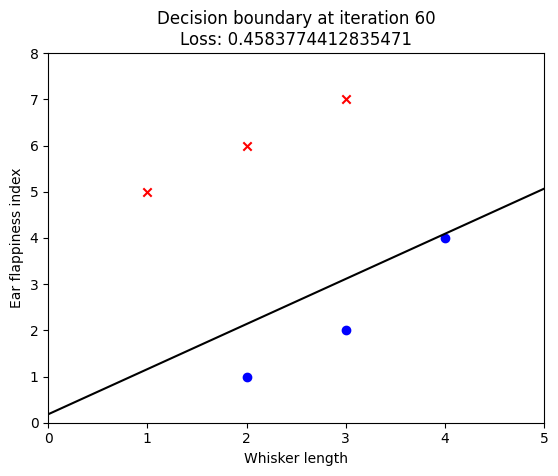

Iteration 60: Theta=[ 0.04739475  0.25342232 -0.25946218], Loss=0.4583774412835471


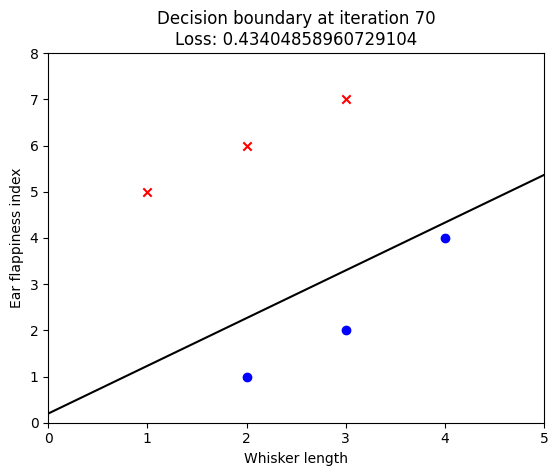

Iteration 70: Theta=[ 0.05633317  0.29448797 -0.28496725], Loss=0.43404858960729104


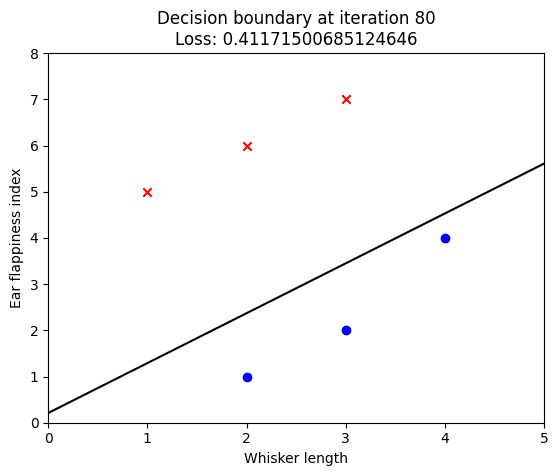

Iteration 80: Theta=[ 0.0649683   0.33394185 -0.30920989], Loss=0.41171500685124646


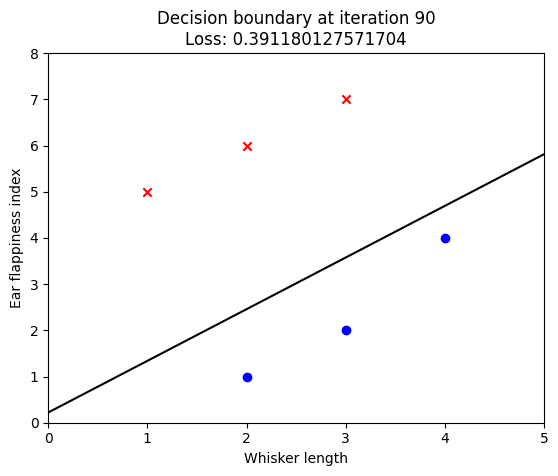

Iteration 90: Theta=[ 0.07328952  0.37180678 -0.33239254], Loss=0.391180127571704


In [30]:
#training the model
weights = logistic_regression(X,y)